In [68]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Import Feature Engineering / Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline 

# Import Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import Cross val & Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Import model evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Model inference
import pickle 

# Import warning
import warnings
warnings.filterwarnings('ignore')

Tuning - nyari model mana yg plg the best. mau cari degree yg plg bgs yg mana.  
Hyperparameter: apa yg mau kt pake, degree nya brp aja  

Cross validation - adanya data leak yg menyebabkan overfit. data dr train set bocor ke test set. makanya di kasi validasi sblm test set. br base nya di uji kpd test set.  
ada mean & standard deviasi, default nya 5 fold, nyari best model

Tuning:  dari hasil crossval di tune biar hasil after tuning lebih bgs
* Grid search - contohnya kalo SVR: C, kernel, degree, gamma  
contohnya banyakkin c, di panjangin nanti buat tiap parameter, test 1 1  
* Random search: dari grid search td, di cari scr acak, jd g semua grid diambil, lebih cpt dr gridsearch  

Pipeline: bikin pipa utk jadiin 1 semua yg .fit sm .transform, bs buat regresi jg

In [2]:
# Load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
df = df_ori.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check dataset -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


statement >>> misal ada missing value, mari lihat jumlah dan persentase nya.

In [4]:
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100)}%')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64%


personal note: ngetrain model semain byk data semakin byk belajar, jd lebih bgs kalo lebih byk data, jd jgn main asal drop missval. 

karena kebutuhan kt skrg utk bljr, jadi seluruh missval di drop aja

In [5]:
df.dropna(inplace=True)

In [6]:
# Check after drop
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100)}%')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64%


In [7]:
# Check data duplicate
df.duplicated().sum()

0

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Split num cat col
X = df.drop(['Survived'], axis = 1)
y = df.Survived

In [10]:
# Train, tes, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70) #randomstate untuk ngunci tiap running state nya sama
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
97,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
310,311,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C


Saya berasumsi PassengerID, Name, dan Ticket itu korelasi dengan target nya rendah

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Feature selection
X_train.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
X_test.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [13]:
# Split num col & cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical: {num_col}')
print(f'categorical: {cat_col}')

numerical: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical: ['Sex', 'Cabin', 'Embarked']


statement contoh >>> setelah berhasil memisahkan categorical & numerical column, skrg saya akan melakukan scaling menggunakan `StandardScaler()` karena .....  
Lalu mengencode dengan `OneHotEncoder()` karena .....  
Setelah itu dimasukkan ke dalam variabel preprocess untuk dilakukan transformasi menggunakan `ColumnTransformer`

In [14]:
# Feature scaling and encoding in column transformer
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # spare supaya bentuknya dense # sparse vs dense matrix google

preprocess = ColumnTransformer(
    transformers= [
        ('numerical', scaler, num_col),
        ('categorical', encoder, cat_col)
        ], 
    remainder='passthrough'
)

In [15]:
# Model definition using pipeline
pipe_log = make_pipeline(preprocess, LogisticRegression())
pipe_svc = make_pipeline(preprocess, SVC())
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_nb = make_pipeline(preprocess, GaussianNB())
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=70))
pipe_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=70))
pipe_ada = make_pipeline(preprocess, AdaBoostClassifier())

In [16]:
# Define cross val for each pipeline
cv_log = cross_val_score(pipe_log, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_nb = cross_val_score(pipe_nb, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv = 5, scoring='f1', n_jobs=-1)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

In [17]:
# Finding best model based on Cross_val_score (mean)

name_model = []
cv_scores = 0

for cv,name in zip([cv_log, cv_svc, cv_knn, cv_nb, cv_dt, cv_rf, cv_ada],
                   ['log', 'svc', 'knn', 'nb', 'dt', 'rf', 'ada']):
    print(name)
    print('f1-score - All - Cross Validation :', cv)
    print('f1-score - Mean - Cross Validation :', cv.mean())
    print('f1-score - Std - Cross Validation :', cv.std())
    print('f1-score - Range of test set :', (cv.mean()-cv.std()), '-',(cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print(f'Best Model: {name_model}')
print(f'Cross Val Mean from best model: {cv_scores}')

log
f1-score - All - Cross Validation : [0.76190476 0.87179487 0.92682927 0.75675676 0.76923077]
f1-score - Mean - Cross Validation : 0.8173032855959684
f1-score - Std - Cross Validation : 0.06929807971867406
f1-score - Range of test set : 0.7480052058772944 - 0.8866013653146425
--------------------------------------------------
svc
f1-score - All - Cross Validation : [0.79069767 0.86486486 0.8372093  0.66666667 0.76923077]
f1-score - Mean - Cross Validation : 0.7857338555012974
f1-score - Std - Cross Validation : 0.06838921710377249
f1-score - Range of test set : 0.7173446383975248 - 0.8541230726050699
--------------------------------------------------
knn
f1-score - All - Cross Validation : [0.77272727 0.85714286 0.7804878  0.73684211 0.73684211]
f1-score - Mean - Cross Validation : 0.7768084290548989
f1-score - Std - Cross Validation : 0.0439964272515176
f1-score - Range of test set : 0.7328120018033812 - 0.8208048563064165
--------------------------------------------------
nb
f1-sc

Best model nya adalah Randomforest, sehingga kita akan melakukan model tuning untuk model RF. Pertama tam kita cek dulu f1 score untuk train dan test nya beserta dengan False Negative dan Positive nya

In [18]:
# Train best model
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=70))])

In [21]:
# Evaluate model RF
y_pred_train = pipe_rf.predict(X_train)
y_pred_test = pipe_rf.predict(X_test)

# Print classification report
print(f'Random Forest - Train - Before Tuning')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Random Forest - Test - Before Tuning')
print(f'{classification_report(y_test, y_pred_test)}')

Random Forest - Train - Before Tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        98

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146


Random Forest - Test - Before Tuning
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.88      0.84      0.86        25

    accuracy                           0.81        37
   macro avg       0.78      0.79      0.79        37
weighted avg       0.82      0.81      0.81        37



Fokus kita ke f1-score, untuk train = 100%, untuk test = 81%.  
Data survie-train = 98 data, survive-test = 25 data

recall: jika fokusinya ingin meminimalisir false negative    
- biasanya untuk prediksi covid atau tidak
precision: jika kalian fokusnya ingin meminimalisir false positive 
- email spam, security breach, dll

f1 score: jika kalian emnanggap FP dan FN sama pentingnya  
accuracy: jika data kalian balance --> liat dari column support, dari 0 yg meninggal ada 48 org, yg selamat ada 98 utk train set


lain kali di pipe nya pake max depth biar hasil g 100 persen semua, cukup liat yg di row 1 dan f1-score

Text(0.5, 1.0, 'Before Tuning-test')

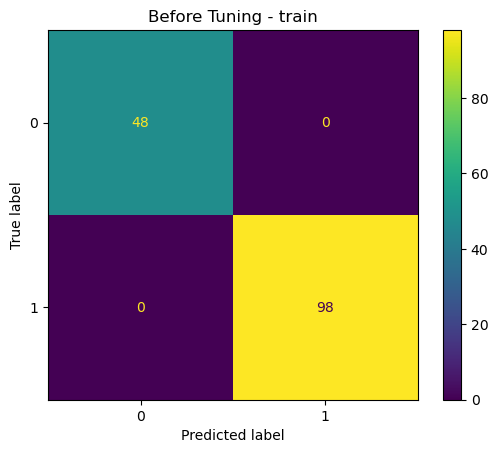

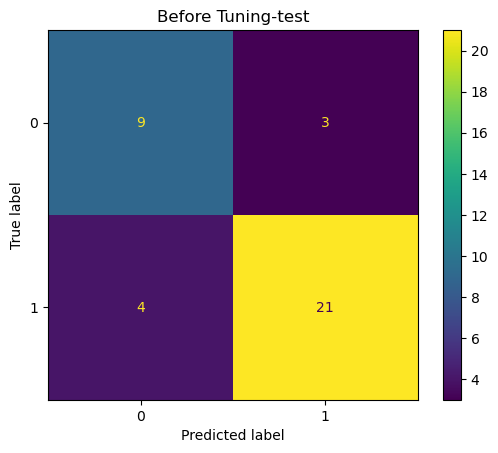

In [30]:
# Check False Negative and False Positive
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=pipe_rf.classes_)
disp_train.plot()
plt.title('Before Tuning - train')

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=pipe_rf.classes_)
disp_test.plot()
plt.title('Before Tuning-test')

terlihat untuk train FN dan FP nya = 0, artinya ini membuktikan dari f1-score train set nya yang 100%
- test set ada FN =4, artinya terdapat data yang salah prediksi, diprediksi nya not survived(negative) tapi actual datanya adakag survived(positive).

- FP nya = 3, artinya terdapat 3 data yg salah prediksi, di prediksi nya survived(positive) tapi actual datanya not survived(negative)

In [48]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # calculate f1-score
    train_f1=f1_score(y_train,y_pred_train)
    test_f1=f1_score(y_test,y_pred_test)

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)

    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]


    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-fn':fn_train,
        'test-fn': fn_test,
        'train-fp': fp_train,
        'test-fp':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports 


In [56]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

,After Tuning,Before Tuning
train-f1score,0.946341,1.000000
test-f1score,0.867925,0.857143
train-fn,1.000000,0.000000
test-fn,2.000000,4.000000
train-fp,10.000000,0.000000
test-fp,5.000000,3.000000


Selanjutnya hyperparameter tuning untuk mencari nilai parameter terbaik.

In [38]:
np.linspace(10,100,2)

array([ 10., 100.])

In [63]:
# Define the random forest parameter grid
params = {
    'randomforestclassifier__n_estimators':(10,20,30,40,50,60,70,80,90,100),
    'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'randomforestclassifier__max_depth':(1,2,3,4,5,6,7,8,9,10),
    'randomforestclassifier__min_samples_split':(2,4,6,8,10),
    'randomforestclassifier__min_samples_leaf':(1,2,3,4,5)
    }
# Define Random search
tuning = RandomizedSearchCV(pipe_rf, param_distributions = params, n_iter=25, cv=5, scoring='f1', n_jobs=-1, random_state=27)

# Train the tune model
tuning.fit(X_train, y_train)

# Get the best parameters
best_params = tuning.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'randomforestclassifier__n_estimators': 90, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}


In [64]:
# Get the best hyperparameters
bestParams = tuning.best_estimator_
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=90, random_state=70))])

In [65]:
# Define best param & model tuning
best_rf = tuning.best_estimator_

#  Evaluate best RF
y_pred_train_best = best_rf.predict(X_train)
y_pred_test_best = best_rf.predict(X_test)

# Print classification report
print(f'Random Forest - Train - After Tuning')
print(f'{classification_report(y_train, y_pred_train_best)}')
print('')
print(f'Random Forest - Test - Before Tuning')
print(f'{classification_report(y_test, y_pred_test_best)}')

Random Forest - Train - After Tuning
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        48
           1       0.93      0.98      0.96        98

    accuracy                           0.94       146
   macro avg       0.94      0.92      0.93       146
weighted avg       0.94      0.94      0.94       146


Random Forest - Test - Before Tuning
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.81      0.84      0.82        25

    accuracy                           0.76        37
   macro avg       0.72      0.71      0.72        37
weighted avg       0.75      0.76      0.75        37



Text(0.5, 1.0, 'After Tuning-test')

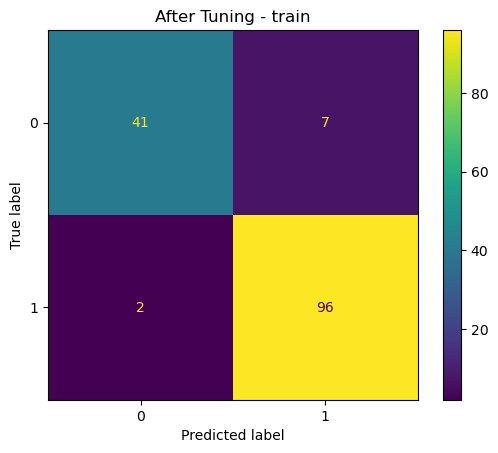

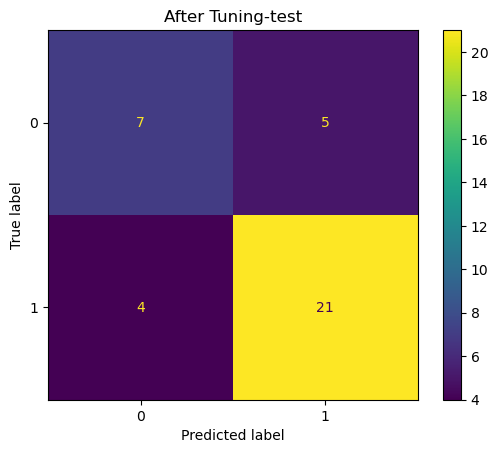

In [66]:
# Check False Negative and False Positive - After Tuning
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=best_rf.classes_)
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=best_rf.classes_)

disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best,display_labels=best_rf.classes_)
disp_train_best.plot()
plt.title('After Tuning - train')

disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best,display_labels=best_rf.classes_)
disp_test_best.plot()
plt.title('After Tuning-test')

In [67]:
all_reports_aft = performance_report(all_reports, y_train, y_pred_train_best, y_test, y_pred_test_best, 'After Tuning')
pd.DataFrame(all_reports)

,After Tuning,Before Tuning
train-f1score,0.955224,1.000000
test-f1score,0.823529,0.857143
train-fn,2.000000,0.000000
test-fn,4.000000,4.000000
train-fp,7.000000,0.000000
test-fp,5.000000,3.000000


statement:  
walaupun train f1 turun dan test f1 turun, tapi model lebih goodfit, sebenernya tadi dapet yg lebih bagus tapi lupa setting randomstate di randomizedsearchCV

In [69]:
# Model Saving
with open('best_model.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_rf, file_1)

### Conclusion:  
- kelebihan model (data spt apa yg model bs prediksi scr bnr)
- kelemaham model (data spt apa yg model bs miss prediksi)

- Further improvement:
    - Hal2 apa yg bs kalian suggest untuk diri kalian sendiri atau orang yg lain yg ingin meng-improve model kalian? 
    - Contoh: gunakan scaling yg beda, pakai PCA, pakai gridsearchCV, dst...

- Business insight: rekomendasi terhadap stakeholders

In [71]:
# Detect all originalcolumns to create new inference data (unseen data)
print(df_ori.columns)
print(df_ori.loc[10])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                        4.0
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object
